In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santiago del estero
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ormara
Processing Record 4 of Set 1 | la paz
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | talaya
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | paris
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | venado tuerto
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | ambulu
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | faya
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | aswan
Processing Reco

Processing Record 38 of Set 4 | coremas
Processing Record 39 of Set 4 | acaponeta
Processing Record 40 of Set 4 | glubokoe
City not found. Skipping...
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | moa
Processing Record 43 of Set 4 | acarau
Processing Record 44 of Set 4 | danjiangkou
Processing Record 45 of Set 4 | vanimo
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | mankono
Processing Record 49 of Set 4 | ukiah
Processing Record 50 of Set 4 | walvis bay
Processing Record 1 of Set 5 | canning
Processing Record 2 of Set 5 | la rioja
Processing Record 3 of Set 5 | yishui
Processing Record 4 of Set 5 | poum
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | rapid valley
Processing Record 7 of Set 5 | shitanjing
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of Set 5 | ha giang
Processing Record 10 of Set 5 | vaitupu
City not found. Skipping...
Processing

Processing Record 25 of Set 8 | vostok
Processing Record 26 of Set 8 | iringa
Processing Record 27 of Set 8 | aden
Processing Record 28 of Set 8 | patna
Processing Record 29 of Set 8 | prince george
Processing Record 30 of Set 8 | porbandar
Processing Record 31 of Set 8 | honiara
Processing Record 32 of Set 8 | presidente medici
Processing Record 33 of Set 8 | sur
Processing Record 34 of Set 8 | quatre cocos
Processing Record 35 of Set 8 | pontes e lacerda
Processing Record 36 of Set 8 | kungurtug
Processing Record 37 of Set 8 | atar
Processing Record 38 of Set 8 | quebo
Processing Record 39 of Set 8 | lasa
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | ayna
Processing Record 42 of Set 8 | misratah
Processing Record 43 of Set 8 | verkhnevilyuysk
Processing Record 44 of Set 8 | phalodi
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | sembe
Processing Record 47 of Set 8 | silver city
Processing Record 48 of Set 8 | seremban
Processin

Processing Record 16 of Set 12 | chapais
Processing Record 17 of Set 12 | korla
Processing Record 18 of Set 12 | ponta delgada
Processing Record 19 of Set 12 | manresa
Processing Record 20 of Set 12 | togur
Processing Record 21 of Set 12 | bilma
Processing Record 22 of Set 12 | sorvag
City not found. Skipping...
Processing Record 23 of Set 12 | minsk mazowiecki
Processing Record 24 of Set 12 | kavieng
Processing Record 25 of Set 12 | esmeraldas
Processing Record 26 of Set 12 | kiruna
Processing Record 27 of Set 12 | black river
Processing Record 28 of Set 12 | sieradz
Processing Record 29 of Set 12 | kytlym
City not found. Skipping...
Processing Record 30 of Set 12 | kasongo-lunda
Processing Record 31 of Set 12 | vila velha
Processing Record 32 of Set 12 | luebo
Processing Record 33 of Set 12 | pidhorodne
Processing Record 34 of Set 12 | soledade
Processing Record 35 of Set 12 | emerald
Processing Record 36 of Set 12 | tulu bolo
Processing Record 37 of Set 12 | aitape
Processing Record

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago Del Estero,-27.7951,-64.2615,55.72,44,0,6.91,AR,2022-05-05 03:26:59
1,Rikitea,-23.1203,-134.9692,77.81,84,74,19.30,PF,2022-05-05 03:23:13
2,Ormara,25.2088,64.6357,80.40,75,0,4.29,PK,2022-05-05 03:27:00
3,La Paz,-16.5000,-68.1500,39.18,100,20,3.44,BO,2022-05-05 03:22:04
4,Port Elizabeth,-33.9180,25.5701,59.29,100,20,3.44,ZA,2022-05-05 03:26:29
5,Nikolskoye,59.7035,30.7861,39.09,60,96,7.47,RU,2022-05-05 03:27:01
6,Talaya,61.3833,152.7500,34.09,83,22,2.77,RU,2022-05-05 03:27:02
7,Chokurdakh,70.6333,147.9167,24.10,82,100,6.13,RU,2022-05-05 03:27:02
8,Busselton,-33.6500,115.3333,61.74,44,0,15.66,AU,2022-05-05 03:27:03
9,Hithadhoo,-0.6000,73.0833,83.17,74,100,19.04,MV,2022-05-05 03:27:04


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santiago Del Estero,AR,2022-05-05 03:26:59,-27.7951,-64.2615,55.72,44,0,6.91
1,Rikitea,PF,2022-05-05 03:23:13,-23.1203,-134.9692,77.81,84,74,19.30
2,Ormara,PK,2022-05-05 03:27:00,25.2088,64.6357,80.40,75,0,4.29
3,La Paz,BO,2022-05-05 03:22:04,-16.5000,-68.1500,39.18,100,20,3.44
4,Port Elizabeth,ZA,2022-05-05 03:26:29,-33.9180,25.5701,59.29,100,20,3.44
5,Nikolskoye,RU,2022-05-05 03:27:01,59.7035,30.7861,39.09,60,96,7.47
6,Talaya,RU,2022-05-05 03:27:02,61.3833,152.7500,34.09,83,22,2.77
7,Chokurdakh,RU,2022-05-05 03:27:02,70.6333,147.9167,24.10,82,100,6.13
8,Busselton,AU,2022-05-05 03:27:03,-33.6500,115.3333,61.74,44,0,15.66
9,Hithadhoo,MV,2022-05-05 03:27:04,-0.6000,73.0833,83.17,74,100,19.04


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

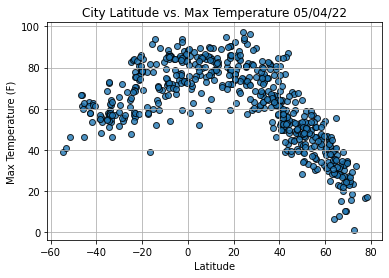

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

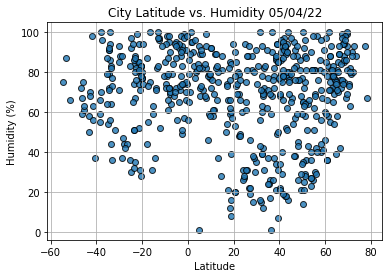

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

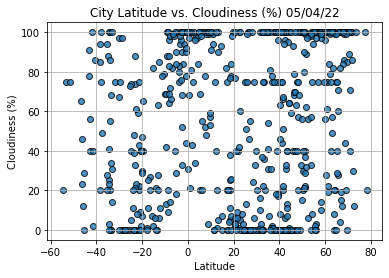

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

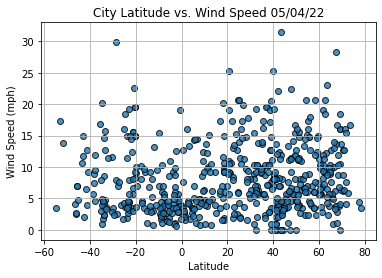

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()